## TASK 1 - Blob detection
Group Number: #Group 11-13 12

### 1. Data import and preparation

Read an input image from your local directory as grayscale and normalize the values between 0 and 1.

In [1]:
%load_ext autoreload
%autoreload 1
%aimport filters, utils
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt
import numpy as np
import filters
import utils
import cv2

# Adjust size of image plot here
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 150

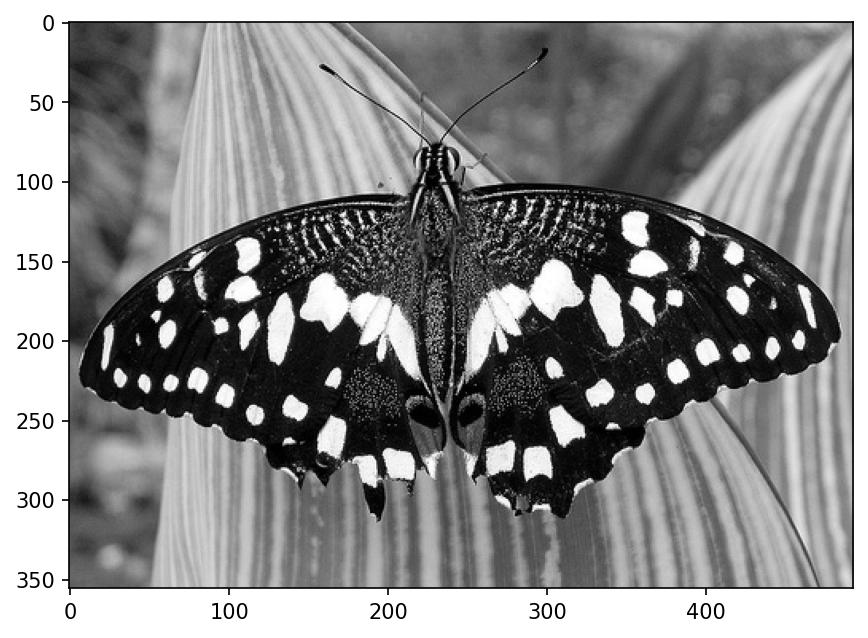

In [2]:
#student_code start
org_img = cv2.imread("data/butterfly.jpg",0)
org_img = org_img.astype('float32')/255.0
plt.imshow(org_img, cmap='gray')
#student_code end

### 2. Scale Space Creation

Generate the image pyramid using ***get_log_pyramid(..)*** in _filters.py_. Check your results with ***utils.show_plot(..)***

***Submission:*** Save the *third level* of the image scale space of the butterfly as **task1_filtered.png** using ***utils.show_plot(..)***.


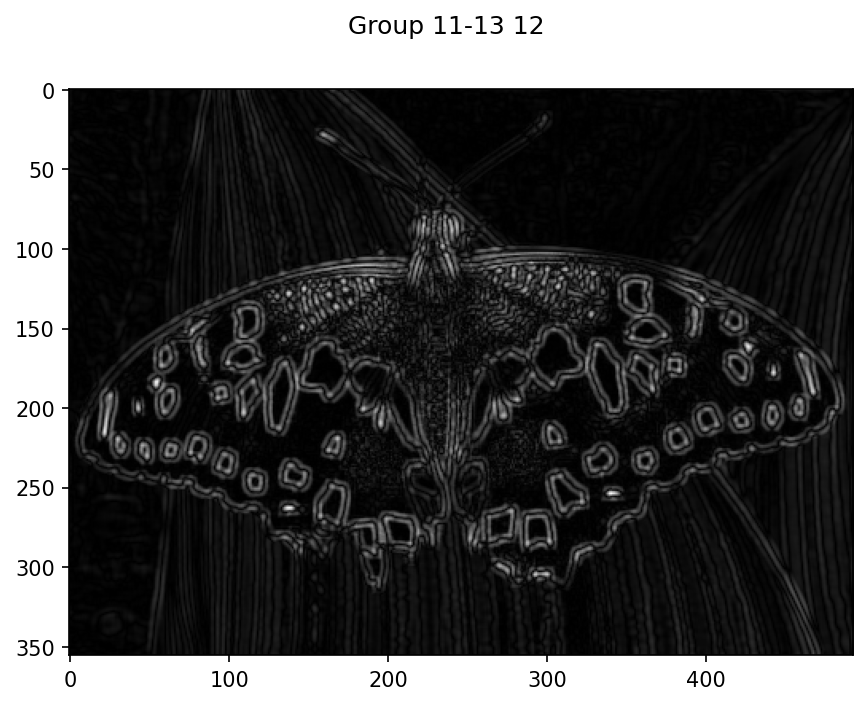

In [3]:
sigma = 2
k = 1.3
levels = 10

#student_code start
image_3d, sigmas = filters.get_log_pyramid(org_img, sigma, k, levels)
utils.show_plot(image_3d[:,:,2], "Group 11-13 12", "task1_filtered.png") #I edited showplot to be in gray colorspace
#student_code end

### 2. Blob detection

Perform the first step of the non-maximum suppression by setting the values in the scale space below a certain threshold to zero. Then, look for maxima in a defined local neighbourhood, in this case: the 26-connection. ***skimage.feature.peak_local_max(..)*** is useful to obtain local maxima. Complete method ***utils.show_blobs(..)*** and plot the blobs.


***Submission:*** Save the image including the blobs as **task1_blobs_full.png** (threshold around 0.3).

C:\Users\bartek\AppData\Local\Temp/ipykernel_12300/612352817.py:5: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxes = peak_local_max(image_3d, footprint=mask, exclude_border=0, indices=True)


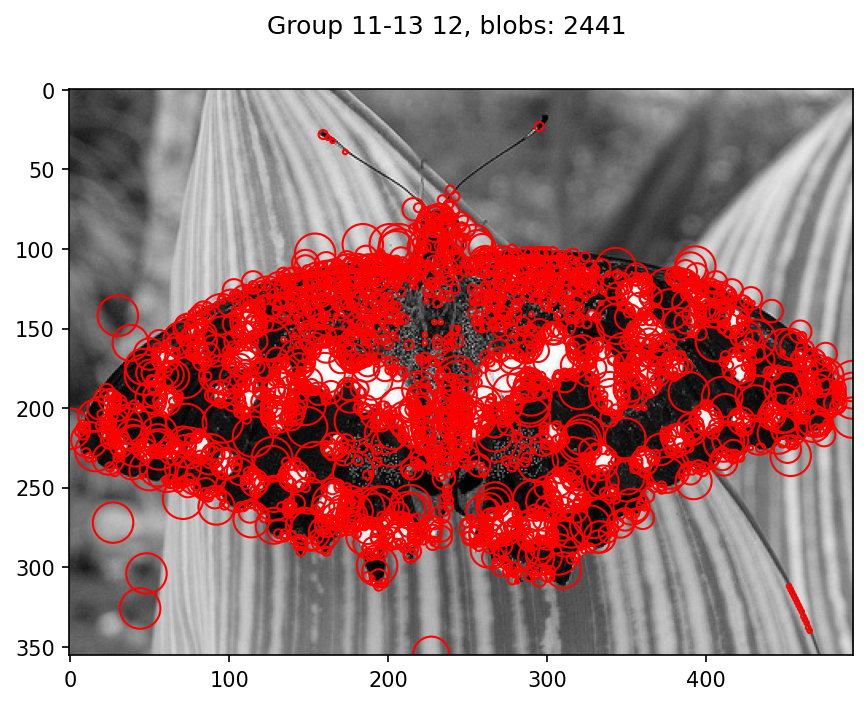

In [4]:
thres = 0.3
#student_code start
image_3d [image_3d < thres] = 0
mask = np.ones((3,3,3))
local_maxes = peak_local_max(image_3d, footprint=mask, exclude_border=0, indices=True)

utils.show_blobs(org_img, local_maxes, sigmas,"Group 11-13 12","task1_blobs_full.png")
#student_code ends


### 3. Evaluation 

Apply the process to a half-sized version of the input image. Plot your results as well with ***utils.show_blobs(..)***.

_***HINT:***_
_cv2.resize(..)_


***Submission:*** Save the result as **task1_blobs_half.png**.

C:\Users\bartek\AppData\Local\Temp/ipykernel_12300/4055421570.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxes_h = peak_local_max(image_3dh, footprint=mask, exclude_border=0, indices=True)


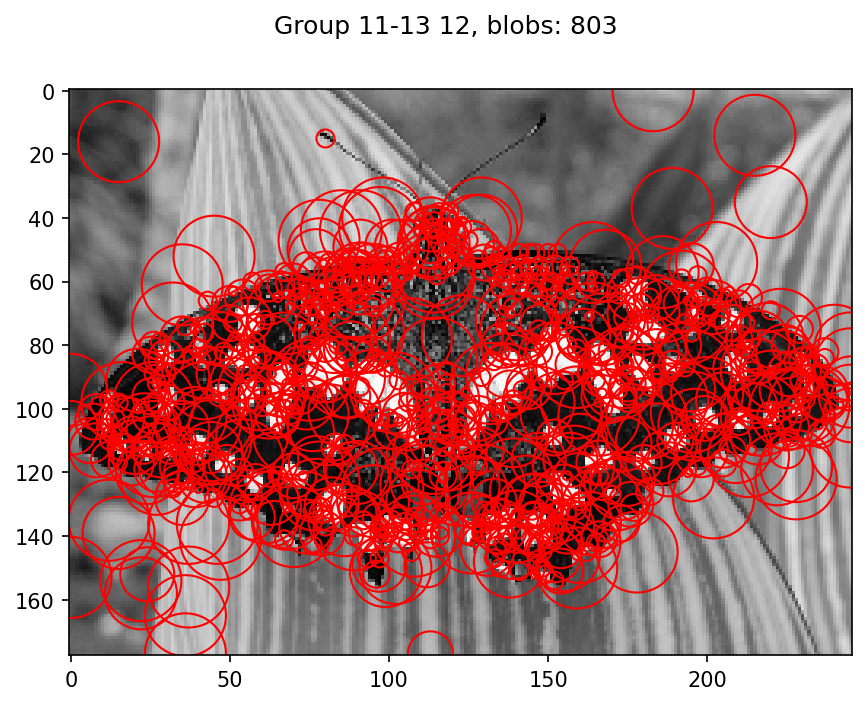

In [5]:
thres = 0.3

#student_code start
h,w = org_img.shape
half_org = cv2.resize(org_img, (w//2, h//2))

image_3dh, sigmas = filters.get_log_pyramid(half_org, sigma, k, levels)
image_3dh [image_3dh < thres] = 0

mask = np.ones((3,3,3))
local_maxes_h = peak_local_max(image_3dh, footprint=mask, exclude_border=0, indices=True)

utils.show_blobs(half_org, local_maxes_h, sigmas,"Group 11-13 12"," task1_blobs_half.png")
#student_code end


*** 
#### Taking a close look at the detected blobs on different image scales, is the method able to find blobs in a scale-invariant way? What could be reasons for observed errors or inaccurately detected blobs? 

# The method is not very good for detecting blobs in scale invariant way. The reason of observed errors is that different sizes of blobs on scale-invariant approach could be detected (in better way) by different size kernels. The kernel of super small size is not really able to detect big size blob on single scale with one convolution.

#### 3.1 LoG Response

Pick a detected keypoint and plot the response of the LoG for all scales in both image versions. The outcome should be a 2D plot where the x-axis represents the scale of the filter and the y-axis the filter response at the selected keypoint position. 

_***HINT:***_
_plt.plot(..)_

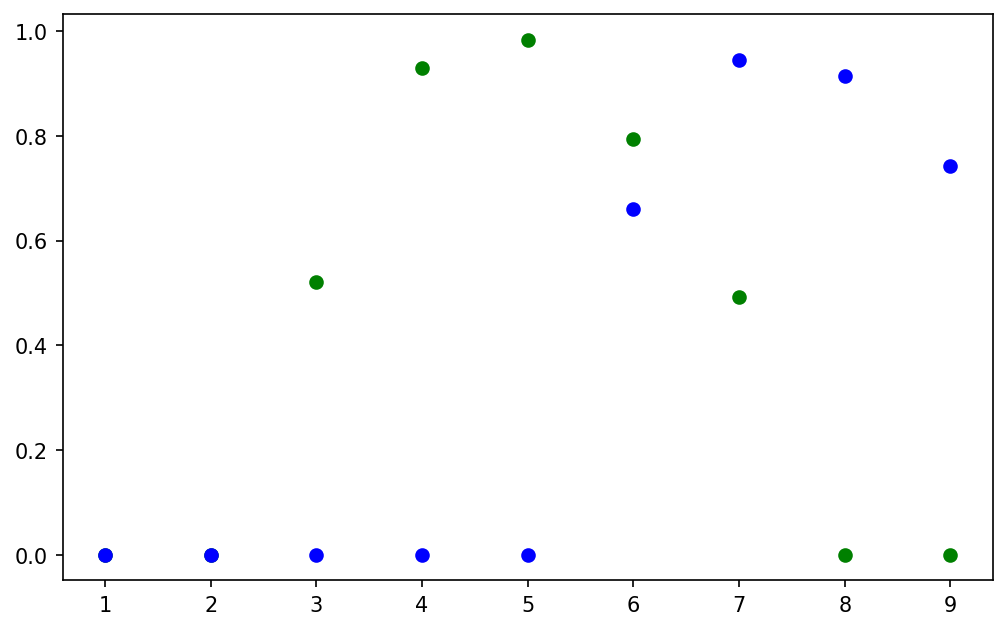

In [6]:
#student_code start
point_half = (121,70)
point = (243,141) 
values_half = image_3dh[point_half]
values = image_3d[point]


fig, ax = plt.subplots()
ax.scatter(range(1,10), values_half, color='green') 
ax.scatter(range(1,10), values, color='blue')
plt.show()
#student_code end

*** 
#### Describe and explain the difference between the two LoG response curves.

### The blob is detected later in bigger image  (in scale 6., in comparison to scale 3), as the kernel size matters a lot in this case. As the point is "inside" the bigger blob, and blob detection depends on kernel size, the response on first few scales is low, due to no difference between pixel value and its neighour pixels. As bigger blobs are getting detected, the response raises, and eventually gets back to low when it is too small to be detected in smaller image. 
### The "shift" in response on the chart is due to images being different sizes, but using same size kernels (kernel is relatively bigger when operating on smaller image). 
### There is also Y-axis difference due to the same reason (scaling the image down and using same kernel sizes). Interpolated pixels after convolution do not represent exactly the same values as in original image.

#### 3.2 Own Image

Import an image of your choice and apply the process once again. 


***Submission:*** Save the image including blobs with ***utils.show_blobs(..)*** as: **task1_blobs_own.png**

C:\Users\bartek\AppData\Local\Temp/ipykernel_12300/261729125.py:11: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxes2 = peak_local_max(image_3d2, footprint=mask, exclude_border=0, indices=True)


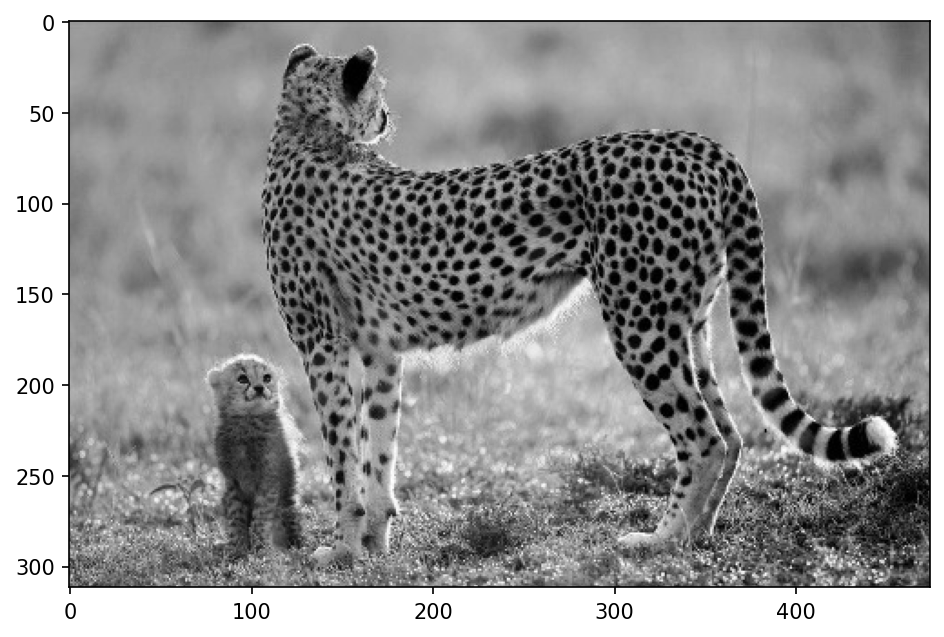

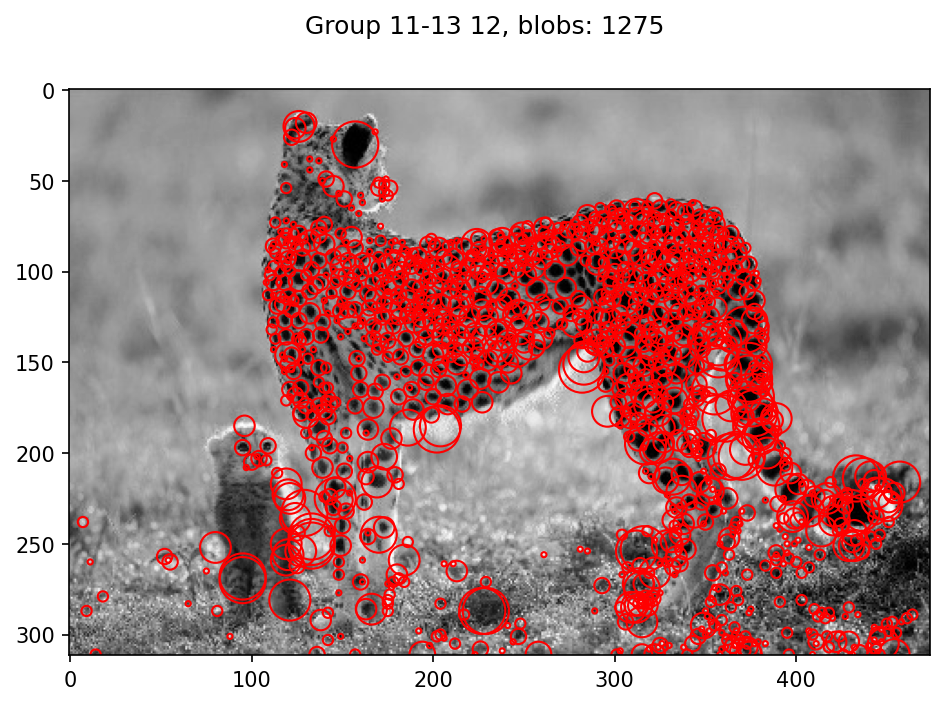

In [7]:
#student_code start
org_img2 = cv2.imread("data/cheetah.jpg",0)
org_img2 = org_img2.astype('float32')/255.0

plt.imshow(org_img2/255.0, cmap='gray')
thres = 0.5
image_3d2, sigmas = filters.get_log_pyramid(org_img2, sigma, k, levels)
image_3d2 [image_3d2 < thres] = 0

mask = np.ones((3,3,3))
local_maxes2 = peak_local_max(image_3d2, footprint=mask, exclude_border=0, indices=True)
utils.show_blobs(org_img2, local_maxes2, sigmas, "Group 11-13 12", "task1_blobs_own.png")

#student_code end